In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader import DataReader
from datetime import datetime


In [8]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock,'iex',start,end)

In [7]:
#Basic Stock Information Analysis

AAPL.head()

,open,high,low,close,volume
date,,,,,
2018-04-24,163.1851,163.8352,158.8019,160.4960,33692017
2018-04-25,160.1808,162.9388,159.9740,161.1954,28382084
2018-04-26,161.6583,163.2442,160.9196,161.7568,27963014
2018-04-27,161.5401,161.8652,158.2207,159.8853,35655839
2018-04-30,159.6984,164.7513,159.4125,162.7812,42427424


In [5]:
AAPL.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,188.803136,190.672815,186.970087,188.923482,3.216777e+07
std,21.261609,21.418182,21.136538,21.261540,1.421846e+07
min,143.365100,145.097600,141.393500,141.582700,1.251979e+07
25%,173.368900,174.828900,171.719300,173.685000,2.263158e+07
50%,187.565300,189.137400,185.790000,187.782800,2.838208e+07
75%,205.314200,207.456600,204.172050,206.232700,3.856339e+07
max,228.995300,231.664500,228.003100,230.275400,9.624675e+07


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2018-04-23 to 2019-04-18
Data columns (total 5 columns):
open      250 non-null float64
high      250 non-null float64
low       250 non-null float64
close     250 non-null float64
volume    250 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.7+ KB


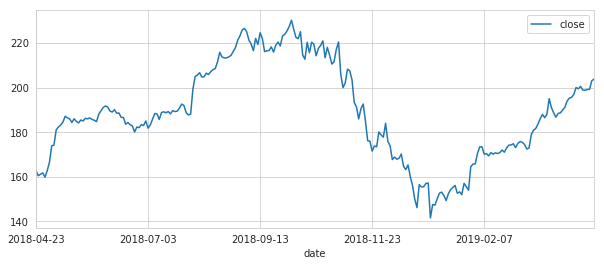

In [19]:
AAPL['close'].plot(legend=True, figsize=(10,4))

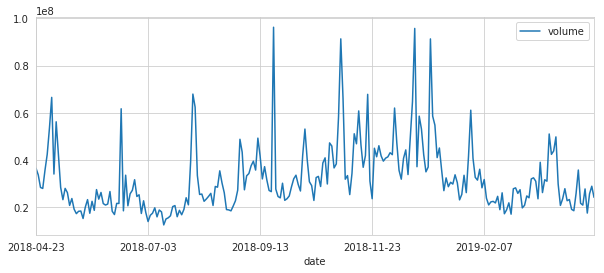

In [20]:
AAPL['volume'].plot(legend=True, figsize=(10,4))

In [21]:
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['close'].rolling(ma).mean()

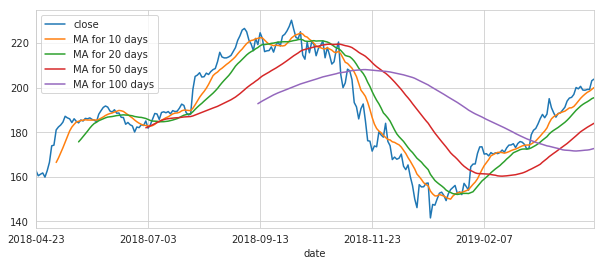

In [22]:

AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

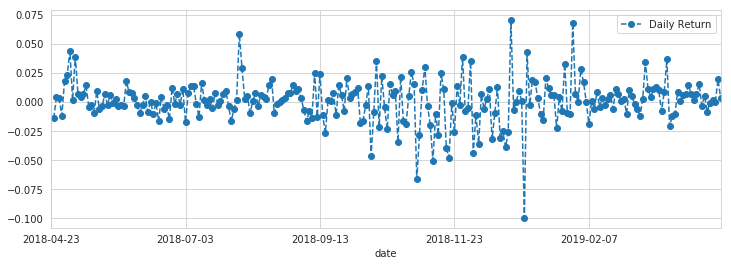

In [23]:
#Daily Return Analysis

AAPL['Daily Return'] = AAPL['close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

In [ ]:
AAPL['Daily Return'].hist(bins=100)

In [6]:
closingprice_df = DataReader(tech_list, 'iex', start, end)['close']

In [7]:
closingprice_df.head(10)

Symbols,AAPL,AMZN,GOOGL,MSFT
date,,,,
2018-04-23,162.7615,1517.86,1073.81,93.7672
2018-04-24,160.4960,1460.09,1022.64,91.5742
2018-04-25,161.1954,1460.17,1022.99,90.7777
2018-04-26,161.7568,1517.96,1043.31,92.6953
2018-04-27,159.8853,1572.62,1031.45,94.2294
2018-04-30,162.7812,1566.13,1018.58,91.9676
2018-05-01,166.5637,1582.26,1040.75,93.4230
2018-05-02,173.9216,1569.68,1026.05,91.9578
2018-05-03,174.2368,1572.08,1026.30,92.5085


In [8]:
tech_returns = closingprice_df.pct_change()
tech_returns.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
date,,,,
2018-04-23,NaN,NaN,NaN,NaN
2018-04-24,-0.013919,-0.038060,-0.047653,-0.023388
2018-04-25,0.004358,0.000055,0.000342,-0.008698
2018-04-26,0.003483,0.039578,0.019863,0.021124
2018-04-27,-0.011570,0.036009,-0.011368,0.016550


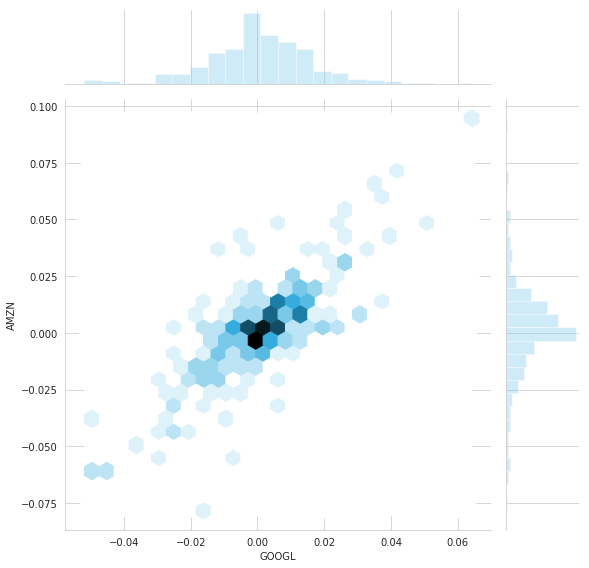

In [9]:
sns.jointplot('GOOGL','AMZN',tech_returns, kind='hex',height=8, color='skyblue')

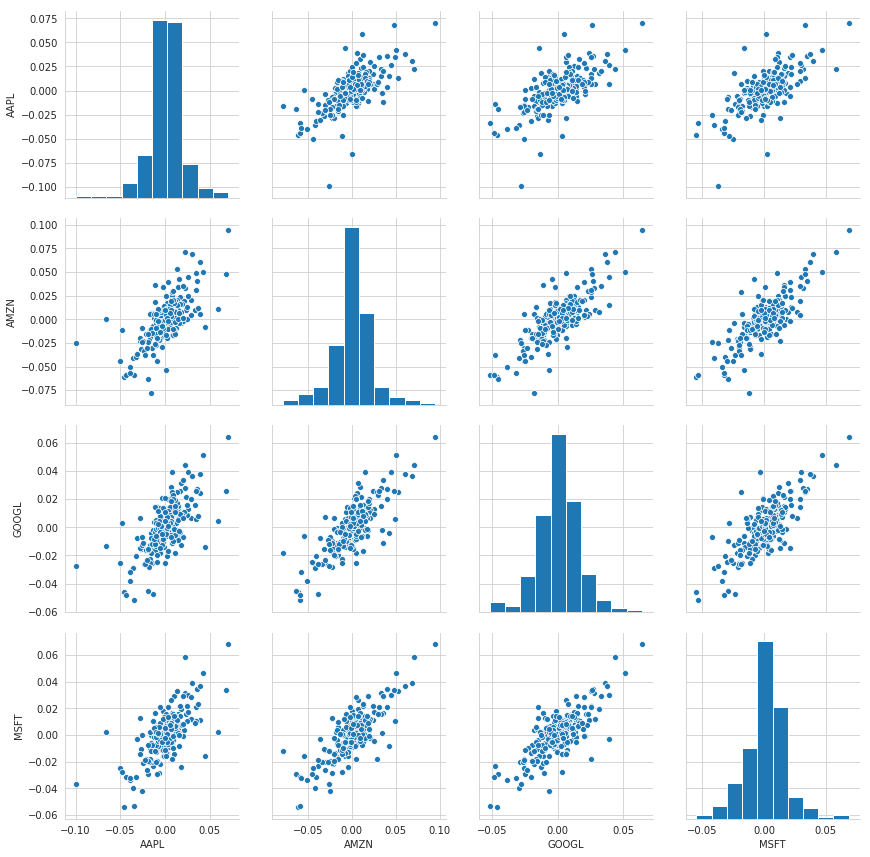

In [10]:
sns.pairplot(tech_returns.dropna(),height=3)

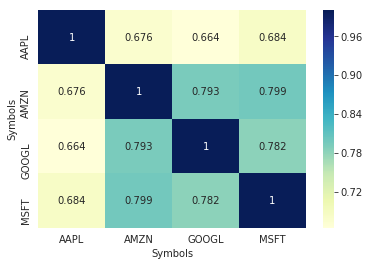

In [11]:
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [12]:
#Risk Analysis

rets = tech_returns.dropna()

rets.head()

Symbols,AAPL,AMZN,GOOGL,MSFT
date,,,,
2018-04-24,-0.013919,-0.038060,-0.047653,-0.023388
2018-04-25,0.004358,0.000055,0.000342,-0.008698
2018-04-26,0.003483,0.039578,0.019863,0.021124
2018-04-27,-0.011570,0.036009,-0.011368,0.016550
2018-04-30,0.018112,-0.004127,-0.012478,-0.024003
